# INF8225 - DEEP IF - Anomaly Detection







## Import & Git

In [ ]:
# Import git projet

!git clone https://github.com/deca1111/Anomaly_Detection_Comparison.git

# changement de folder
%cd /content/Anomaly_Detection_Comparison/

Cloning into 'INF8225-Projet'...
remote: Enumerating objects: 2255, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 2255 (delta 101), reused 177 (delta 64), pack-reused 2041
Receiving objects: 100% (2255/2255), 475.85 MiB | 22.81 MiB/s, done.
Resolving deltas: 100% (759/759), done.
/content/INF8225-Projet


In [ ]:
# Instalation modules utiles
# ! pip install -r requirements.txt

! pip install tensorboardX
! pip install pyyaml
! pip install patool
! pip install setuptools>=41.4.0
! pip install pretrainedmodels>=0.7.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Import utiles

from anomaly_detection.deep_if.train_evaluate import train_evaluate

import torch
import torch.nn as nn

import numpy as np
import yaml

import time
import os
import sys

import urllib.request
import zipfile
import patoolib

import pandas as pd

import argparse

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(DEVICE)

cuda


# Import Dataset

## Unzip Dataset

In [ ]:
compressedFile = "/content/Anomaly_Detection_Comparison/data/data/nih/subset_300_zip/images_subset_300.zip"

targetImagesRoot = "/content/Anomaly_Detection_Comparison/data/data/nih_300/"

# Création folder
os.makedirs(targetImagesRoot, exist_ok=True)

# Unzip
patoolib.extract_archive(compressedFile, outdir=targetImagesRoot)

INFO patool: Extracting /content/INF8225-Projet/data/data/nih/subset_300_zip/images_subset_300.zip ...
INFO:patool:Extracting /content/INF8225-Projet/data/data/nih/subset_300_zip/images_subset_300.zip ...
INFO patool: running /usr/bin/7z x -o/content/INF8225-Projet/data/data/nih_300/ -- /content/INF8225-Projet/data/data/nih/subset_300_zip/images_subset_300.zip
INFO:patool:running /usr/bin/7z x -o/content/INF8225-Projet/data/data/nih_300/ -- /content/INF8225-Projet/data/data/nih/subset_300_zip/images_subset_300.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/INF8225-Projet/data/data/nih/subset_300_zip/images_subset_300.zip extracted to `/content/INF8225-Projet/data/data/nih_300/'.
INFO:patool:... /content/INF8225-Projet/data/data/nih/subset_300_zip/images_subset_300.zip extracted to `/content/INF8225-Projet/data/data/nih_300/'.


'/content/INF8225-Projet/data/data/nih_300/'

## Vérification du Subset

In [ ]:
listImagesFile = "/content/Anomaly_Detection_Comparison/data/data/nih/images_subset_300.txt"

rootImages = "/content/Anomaly_Detection_Comparison/data/data/nih_300/"

# vérification que l'intégralité des images du subset est présent

with open(listImagesFile, 'r') as f:
    listImages = f.read().splitlines()

imagesManquantes = []
nbImages = 0
for image in listImages:
    if not os.path.exists(rootImages + image):
        imagesManquantes.append(image)
    else :
        nbImages += 1

if len(imagesManquantes) > 0:
  print(f"Images manquantes : {imagesManquantes}")
else:
  print(f"Tous les images du subset sont présentes [{nbImages}/{len(listImages)}]")

Tous les images du subset sont présentes [7311/7311]


# Entrainement et évaluation

In [ ]:
# Config depp_if
model = "deep_if"
dataset = "nih"
exp = "reproduce"
_class = "subset"


RUNS = ['0', '1', '2']

configs = []

for run in RUNS:

  config = f"configs/{model}/{dataset}/final/{exp}/class_{_class}/run_{run}/train_eval.yaml"

  print(config)
  configs.append(config)

def _load_config(path):
    with open(path, 'r') as stream:
        config = yaml.load(stream, Loader=yaml.FullLoader)
    return config

configs/deep_if/nih/final/reproduce/class_subset/run_0/train_eval.yaml
configs/deep_if/nih/final/reproduce/class_subset/run_1/train_eval.yaml
configs/deep_if/nih/final/reproduce/class_subset/run_2/train_eval.yaml


## Run 0

### Training

Starting model training ...


Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth" to /root/.cache/torch/hub/checkpoints/inceptionresnetv2-520b38e4.pth
100%|██████████| 213M/213M [10:28<00:00, 356kB/s]
  0%|          | 0/134 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 134/134 [00:40<00:00,  3.30it/s]


Model training is complete.
Starting model evaluation ...


  0%|          | 0/22 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
  0%|          | 0/21 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 21/21 [00:06<00:00,  3.09it/s]


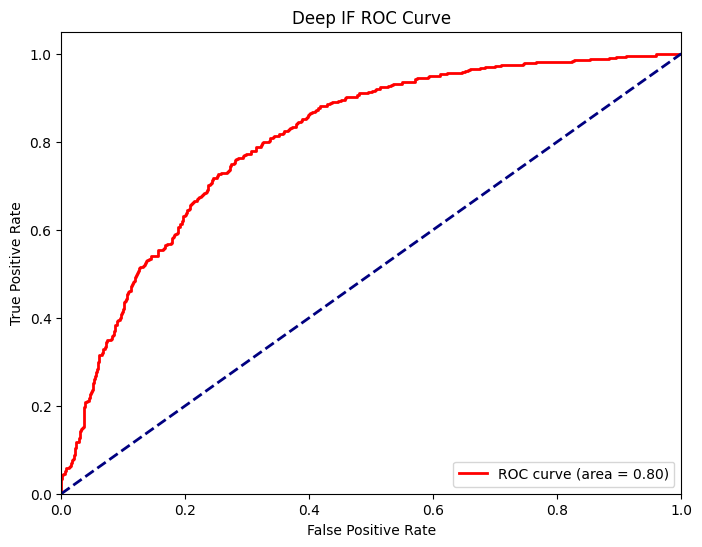

Model evaluation is complete. Results: 
    ROC AUC  F1 Score
0  0.804119  0.669965
Training/evaluation of run 0 is complete. Took: 11.45m
Starting model training ...


  0%|          | 0/134 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
 99%|█████████▉| 133/134 [00:41<00:00,  3.27it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 134/134 [00:41<00:00,  3.25it/s]


Model training is complete.
Starting model evaluation ...


  0%|          | 0/22 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
  0%|          | 0/21 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 21/21 [00:06<00:00,  3.00it/s]


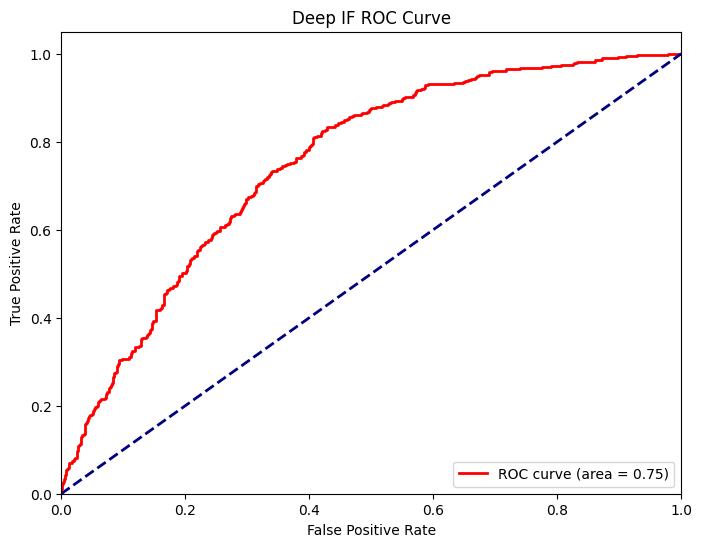

Model evaluation is complete. Results: 
    ROC AUC  F1 Score
0  0.751884  0.669965
Training/evaluation of run 1 is complete. Took: 0.95m
Starting model training ...


  0%|          | 0/134 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 134/134 [00:42<00:00,  3.19it/s]


Model training is complete.
Starting model evaluation ...


  0%|          | 0/22 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
  0%|          | 0/21 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 21/21 [00:07<00:00,  2.93it/s]


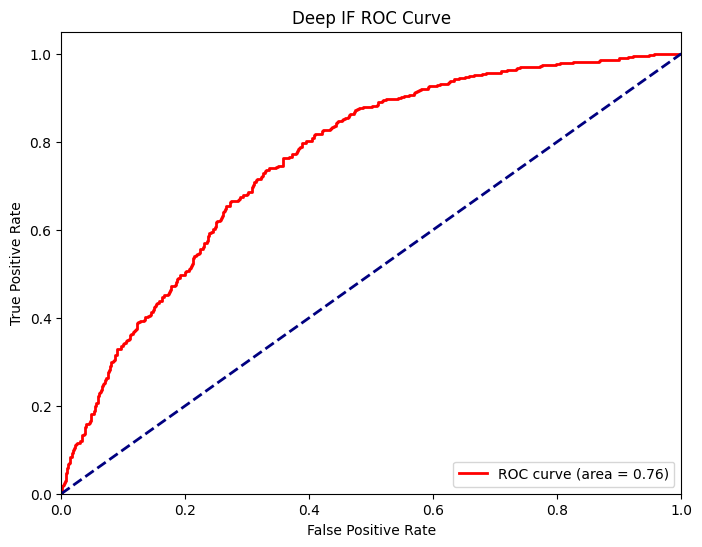

Model evaluation is complete. Results: 
    ROC AUC  F1 Score
0  0.759978  0.669965
Training/evaluation of run 2 is complete. Took: 0.98m


In [ ]:
start_time = time.time()

for i in range(len(configs)):
  trainer = train_evaluate(_load_config(configs[i]))
  print(f"Training/evaluation of run {(i)} is complete. Took: {(time.time() - start_time) / 60:.02f}m")
  start_time = time.time()

del trainer